In [1]:
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio



In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk('TESS Toronto emotional speech set data/'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is Loaded')

Dataset is Loaded


In [3]:
print(paths[:5])


['TESS Toronto emotional speech set data/YAF_disgust/YAF_date_disgust.wav', 'TESS Toronto emotional speech set data/YAF_disgust/YAF_rag_disgust.wav', 'TESS Toronto emotional speech set data/YAF_disgust/YAF_raise_disgust.wav', 'TESS Toronto emotional speech set data/YAF_disgust/YAF_ditch_disgust.wav', 'TESS Toronto emotional speech set data/YAF_disgust/YAF_door_disgust.wav']


In [4]:
labels[:5]


['disgust', 'disgust', 'disgust', 'disgust', 'disgust']

In [5]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,TESS Toronto emotional speech set data/YAF_dis...,disgust
1,TESS Toronto emotional speech set data/YAF_dis...,disgust
2,TESS Toronto emotional speech set data/YAF_dis...,disgust
3,TESS Toronto emotional speech set data/YAF_dis...,disgust
4,TESS Toronto emotional speech set data/YAF_dis...,disgust


In [6]:
df['label'].value_counts()


disgust    800
ps         800
happy      800
sad        800
neutral    800
fear       800
angry      800
Name: label, dtype: int64

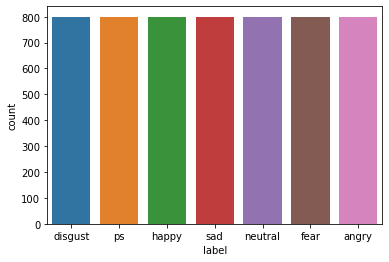

In [7]:
sns.countplot(df['label'])
plt.show()

In [8]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

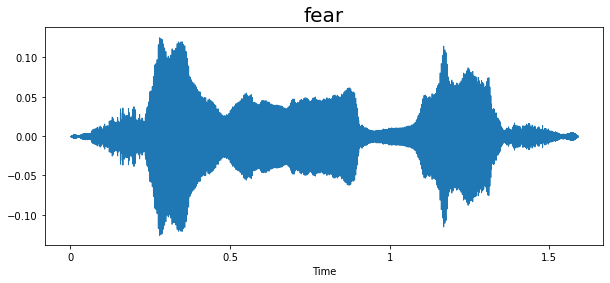

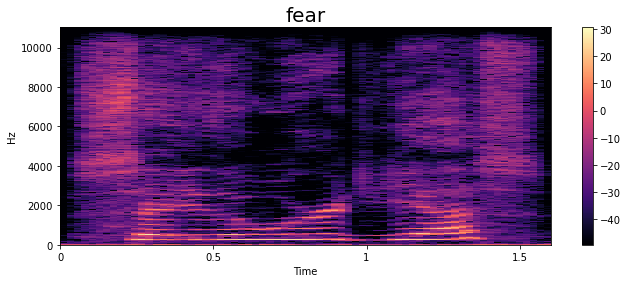

In [9]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [10]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    return mfcc

In [21]:
df=df.sample(frac=1)
df=df[:50]

In [22]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))


In [23]:
import numpy
X = [x for x in X_mfcc]
X = np.array(X)
X.shape
print(X)

[[-4.75251984e+02  1.10841888e+02  3.13980064e+01 -1.20906353e+01
  -1.46200628e+01  3.58484316e+00 -4.59222364e+00  2.85649300e+00
  -1.47381802e+01 -5.24830914e+00 -1.10974522e+01 -1.43243141e+01
  -3.52623844e+00]
 [-4.50427246e+02  8.37123566e+01  2.14266205e+01  2.26447511e+00
   1.05302420e+01 -7.16711807e+00 -1.51263218e+01 -1.27118540e+00
  -2.59914017e+01 -1.18033628e+01 -1.51454916e+01 -1.52557249e+01
  -5.46415091e+00]
 [-4.01485687e+02  9.67387848e+01  1.86604252e+01 -2.78122997e+01
  -5.88605785e+00  9.50410843e+00 -9.65215111e+00 -4.57701874e+00
  -1.79781094e+01 -2.08412147e+00 -1.45616760e+01 -7.57431412e+00
  -4.80239058e+00]
 [-2.95956177e+02  4.74622955e+01 -3.10237522e+01  2.94393873e+00
  -2.18019543e+01  3.30508184e+00 -2.94659448e+00 -1.79755840e+01
  -8.14025879e+00  2.74085546e+00 -1.84956989e+01  6.11511993e+00
  -8.38417625e+00]
 [-4.72859375e+02  1.10438202e+02  3.72349701e+01 -8.93974495e+00
  -1.50861187e+01 -4.06378889e+00 -7.10516739e+00  6.31136835e-01


In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df[['label']])
y = le.transform(df[['label']])

In [34]:
y=y.reshape(50, 1)

In [46]:
print(np.shape(X))

(50, 13)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.20, random_state=101)


In [48]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, 
                      hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [49]:
model.fit(X_train,y_train)


MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [50]:
predictions = model.predict(X_test)


In [51]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)

print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 70.00%


In [52]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       0.50      0.33      0.40         3
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1

    accuracy                           0.70        10
   macro avg       0.71      0.76      0.72        10
weighted avg       0.70      0.70      0.69        10



In [55]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)

model.fit(X_train,y_train)
from sklearn import metrics
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7
